In [25]:
import pandas as pd
import numpy as np

In [26]:
import pylab as plt
import seaborn as sns

In [83]:
data = pd.read_csv('data/measurements.csv')

In [84]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [85]:
data2 = pd.read_excel('data/measurements2.xlsx')

In [86]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [87]:
len(data) == len(data2)

True

#### Observamos que la data en ambos archivos es la misma, por lo que nos quedaremos con uno solo

### Chequeamos si hay duplicados

In [88]:
data.duplicated().any()

False

### Exploramos la información de la data, la cantidad de filas y columnas, además del tipo de datos

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [103]:
# Reemplazar comas por puntos y luego convertir a tipo float
data['consume'] = data['consume'].str.replace(',', '.').astype(float)

In [111]:
data['distance'] = data['distance'].str.replace(',', '.').astype(float)

### Revisamos los valores nulos

In [90]:
data.isna().sum()/len(data)*100

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
AC                0.000000
rain              0.000000
sun               0.000000
refill liters    96.649485
refill gas       96.649485
dtype: float64

### Eliminamos las columnas que contienen mas del 90% de valores nulos ya que no contienen información

In [91]:
data.drop(['refill liters', 'refill gas'], axis=1, inplace=True)

In [92]:
data.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
specials        295
gas_type          0
AC                0
rain              0
sun               0
dtype: int64

### Rellenamos los valores nulos de la columna 'temp_inside' con el promedio

In [93]:
#Transformamos el tipo de dato a numérico
data['temp_inside'] = pd.to_numeric(data['temp_inside'], errors='coerce')

In [94]:
data['temp_inside'].fillna(data['temp_inside'].mean(), inplace=True)

In [95]:
data.isna().sum()

distance          0
consume           0
speed             0
temp_inside       0
temp_outside      0
specials        295
gas_type          0
AC                0
rain              0
sun               0
dtype: int64

In [96]:
data['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

### Observamos que la columna 'specials' contiene la misma información que las columnas 'AC', 'rain' y 'sun' por lo que eliminamos esta columna

In [97]:
data.drop('specials', axis=1, inplace=True)

In [98]:
data.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

### Vamos a revisar la correlación entre las columnas

/var/folders/_f/y45qm8g169s9xw4w9z0psng00000gn/T/ipykernel_66338/1576942673.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(data.corr(), dtype=bool))    # mascara para tapar lo de arriba
/var/folders/_f/y45qm8g169s9xw4w9z0psng00000gn/T/ipykernel_66338/1576942673.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


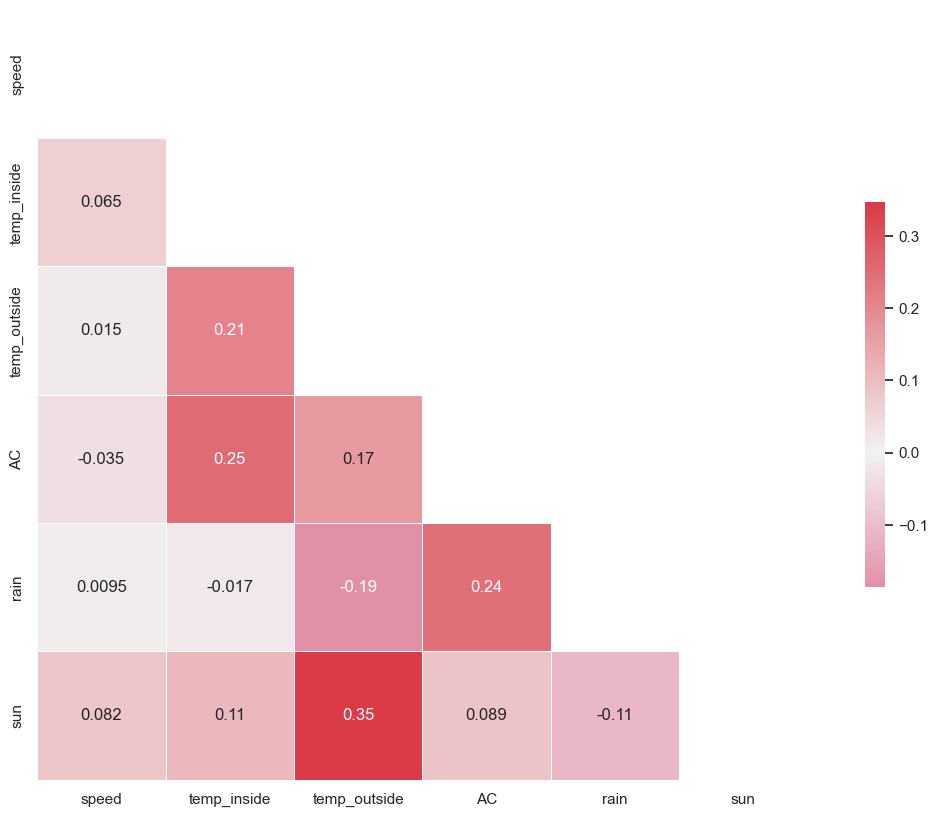

In [99]:
plt.figure(figsize=(15, 10))   # 150x100 pixeles

sns.set(style='white')    # estilo blanco

mask=np.triu(np.ones_like(data.corr(), dtype=bool))    # mascara para tapar lo de arriba

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de  colores


sns.heatmap(data.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

### Agregamos la columna 'fuel_consumed' que contendrá la cantidad de combustible utilizado en función de la distancia recorrida y el consumo.

In [114]:
data['fuel_consumed'] = data['distance'] * data['consume'] / 100

### Agregamos la columna 'cost' para obtener el costo total por distancia

In [125]:
# Definimos los precios por tipo de gasolina
precio_E10 = 1.679
precio_SP98 = 1.706

# Asignamos el precio según el tipo de gasolina y multiplicamos por el combustible consumido
data['cost'] = data.apply(lambda x: x['fuel_consumed'] * precio_E10 if x['gas_type'] == 'E10' else x['fuel_consumed'] * precio_SP98, axis=1)

In [127]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,fuel_consumed,cost
0,28.0,5.0,26,21.934911,12,E10,0,0,0,1.4000,2.350600
1,12.0,4.2,30,21.934911,13,E10,0,0,0,0.5040,0.846216
2,11.2,5.5,38,21.934911,15,E10,0,0,0,0.6160,1.034264
3,12.9,3.9,36,21.934911,14,E10,0,0,0,0.5031,0.844705
4,18.5,4.5,46,21.934911,15,E10,0,0,0,0.8325,1.397768


### Exportamos nuestro nuevo archivo

In [128]:
data.to_csv('data_clean.csv', index=False)

### Visualización

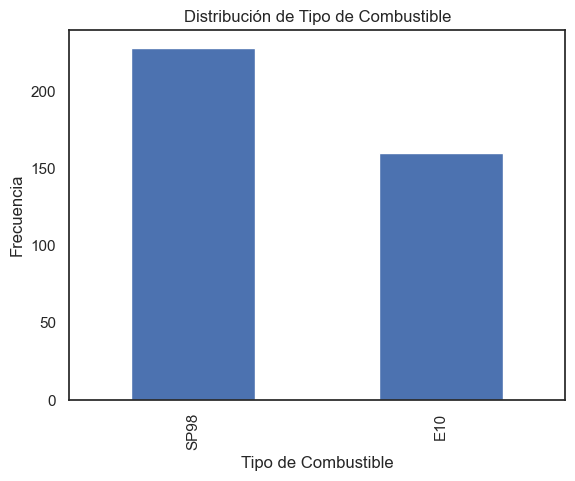

In [117]:
data['gas_type'].value_counts().plot(kind='bar')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tipo de Combustible')
plt.show()

### Observamos que la mayor cantidad de viajes, se realizan con vehículos con combustibles SP98

### Hipótesis

In [122]:
from scipy.stats import t
from scipy.stats import ttest_ind

In [ ]:
'''
H0: El consumo de SP98 y E10, es el mismo
H1: El consumo de SP98 y E10, es distinto
'''

In [123]:
ttest_ind(data[data['gas_type'] == 'E10'].fuel_consumed,data[data['gas_type'] == 'SP98'].fuel_consumed)

Ttest_indResult(statistic=1.089091767035112, pvalue=0.27679289437741406)

#### Si buscamos un intervalo de confianza del 95%, entonces el umbral = 0.05. El pvalor obtenido es mayor que el umbral, por lo tanto no podemos rechazar H0. El consumo de los distintos combustibles, es el mismo

### Segunda hipótesis

In [133]:
ttest_ind(data[data['gas_type'] == 'E10'].cost,data[data['gas_type'] == 'SP98'].cost)

Ttest_indResult(statistic=0.9548700492927994, pvalue=0.34024101940614926)

#### Si buscamos un intervalo de confianza del 95%. El pvalor obtenido es mayor que el umbral, por lo tanto no podemos rechazar H0. Los tipos de combustible cuestan aproximadamente lo mismo por viaje.